In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid.inset_locator import inset_axes, InsetPosition

In [4]:
# Prepare data

N = 3162
# Figure 2a, 2b and 2c
R0_cont = np.linspace(0,3,101)
R0_disc = np.linspace(0,3,101)

Nf_cont = np.zeros(R0_cont.size)
Nf_disc = np.zeros(R0_disc.size)

M = 10000
TotCases_cont = np.zeros((R0_cont.size,M))
TotCases_disc = np.zeros((R0_disc.size,M))
NewCases_cont = np.zeros((R0_cont.size,M))
NewCases_disc = np.zeros((R0_disc.size,M))

for j in range(R0_cont.size):
    P_cont = np.loadtxt('data/Pop_R0={:04.2f}_NTests=0.dat'.format(R0_cont[j]))
    TotCases_cont[j,:] = np.sum(P_cont[:,1:5],axis=1)[:M]  
    NewCases_cont[j,:] = np.gradient(TotCases_cont[j,:])   
    Nf_cont[j] = np.max(TotCases_cont[j,:])

for j in range(R0_disc.size):
    P_disc = np.loadtxt('data/Pop_R0={:04.2f}_NTests=1000.dat'.format(R0_disc[j]))
    TotCases_disc[j,:] = np.sum(P_disc[:,1:5],axis=1)[:M]   
    NewCases_disc[j,:] = np.gradient(TotCases_disc[j,:])
    Nf_disc[j] = np.max(TotCases_disc[j,:])

In [5]:
# Figure 2d

K1 = 400
K2 = 100

Rt1 = np.zeros((K1,200))
Rt2 = np.zeros((K2,200))

for k in range(K1):
    Rt1[k,:] = np.loadtxt('data/Rt_R0=2.3_k={}.dat'.format(k))

for k in range(K2):
    Rt2[k,:] = np.loadtxt('data/Rt_R0=2.7_k={}.dat'.format(k))


Rt1mean = np.nanmean(Rt1,axis=0)
Rt2mean = np.nanmean(Rt2,axis=0)

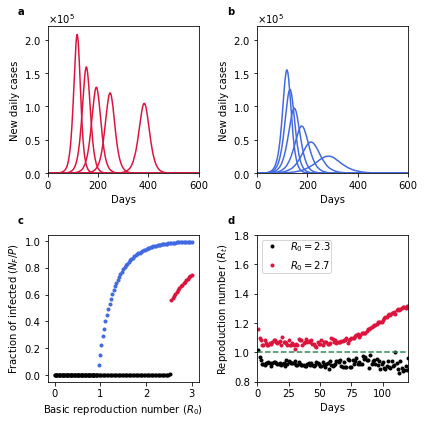

In [6]:
fig, ax = plt.subplots(2,2,figsize=(6,6),tight_layout=True)

thold_cont = 0.95
thold_disc = 2.52

color_cont = 'royalblue'
color_disc = 'crimson'

# Discontinuous flattening
ax[0,0].set_xlim([0,600])
ax[0,0].set_ylim([0,220e3])
ax[0,0].set_xlabel(r'Days')
ax[0,0].set_ylabel(r'New daily cases')
ax[0,0].ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(0,0))
ax[0,0].text(-.2,1.08,r'a',transform=ax[0,0].transAxes,fontweight='bold')
#ax[0,0].plot(NewCases_disc[100,:],color=color_disc)
#ax[0,0].plot(NewCases_disc[85,:],color=color_disc)

for j in [87, 89, 90, 94, 100]:
    ax[0,0].plot(NewCases_disc[j,:],color=color_disc)

# Continuous flattening
ax[0,1].set_xlim([0,600])
ax[0,1].set_ylim([0,220e3])
ax[0,1].set_xlabel(r'Days')
ax[0,1].set_ylabel(r'New daily cases')
ax[0,1].ticklabel_format(axis='y',style='sci',useMathText=True,scilimits=(0,0))
ax[0,1].text(-.2,1.08,r'b',transform=ax[0,1].transAxes,fontweight='bold')


for j in [36, 38, 40, 42, 44, 46]:
    ax[0,1].plot(NewCases_cont[j,:],color=color_cont)
        
# Epidemic transition
ax[1,0].set_xlabel(r'Basic reproduction number ($R_0$)')
ax[1,0].set_ylabel(r'Fraction of infected ($N_F/P$)')
ax[1,0].text(-.2,1.08,r'c',transform=ax[1,0].transAxes,fontweight='bold')

for j in range(R0_cont.size):
    if R0_cont[j] > thold_cont:
        ax[1,0].scatter(R0_cont[j],Nf_cont[j]/N**2,marker='.',color=color_cont,zorder=1000)
    else:
        ax[1,0].scatter(R0_cont[j],Nf_cont[j]/N**2,marker='.',color='black')
    
for j in range(R0_disc.size):
    if R0_disc[j] > thold_disc:
        ax[1,0].scatter(R0_disc[j],Nf_disc[j]/N**2,marker='.',color=color_disc)
    else:
        ax[1,0].scatter(R0_disc[j],Nf_disc[j]/N**2,marker='.',color='black')

ax[1,1].text(-.2,1.08,r'd',transform=ax[1,1].transAxes,fontweight='bold')
ax[1,1].set_xlabel(r'Days')
ax[1,1].set_ylabel(r'Reproduction number ($R_t$)')

ax[1,1].plot(Rt1mean,'.',color='black',label=r'$R_0=2.3$')
ax[1,1].plot(Rt2mean,'.',color='crimson',label=r'$R_0=2.7$')
ax[1,1].plot([0,120],[1,1],'--',color='seagreen')
ax[1,1].set_xlim([0,120])
ax[1,1].set_ylim([0.8,1.8])
ax[1,1].legend(loc='upper left',borderpad=0)

fig.savefig('Fig2.pdf')